#Scrapping

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

In [ ]:
def scrape_SeaGamesDetik(hal):
    global hades
    a = 1
    for page in range(1, hal):
        url = f'https://www.detik.com/search/searchall?query=sea%20games&sortby=time&fromdatex=05/04/2023&todatex=17/06/2023&siteid={page}'
        ge = req.get(url, headers=hades).text
        sop = bs(ge, 'lxml')
        li = sop.find('div', class_='list media_rows list-berita')
        if li:
            lin = li.find_all('article')
            for x in lin:
                link = x.find('a')['href']
                date = x.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]
                headline = x.find('a').find('h2').text
                ge_ = req.get(link, headers=hades).text
                sop_ = bs(ge_, 'lxml')
                content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')
                for x in content:
                    x = x.find_all('p')
                    y = [y.text for y in x]
                    content_ = ''.join(y).replace('\\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')
                    print(f'done[{a}] > {headline[0:10]}')
                    a += 1
                    with open('main.csv', 'a') as file:
                        wr = csv.writer(file, delimiter=',')
                        wr.writerow([headline, date, link, content_])
        else:
            print(f'Halaman {page} tidak ditemukan.')

In [ ]:
scrape_SeaGamesDetik(250)

done[2] > Lolos 8 Be
done[3] > Andai Rama
done[4] > Indonesia 
done[5] > Lawan lebi
done[6] > Lawan lebi
done[7] > Link Live 
done[8] > Tekad Menp
done[9] > Ana/Tiwi k
done[10] > AHY Masuk 
done[11] > Total Bonu
done[12] > Jokowi Ber
done[13] > Rapat di D
done[14] > Peta Terki
done[15] > PAN Makin 
done[16] > Survei Caw
done[17] > Tekan Infl
done[18] > Menjadi Ba
done[19] > Longines W
done[20] > Lolos 8 Be
done[21] > Lawan lebi
done[22] > Ana/Tiwi k
done[23] > Okto-Ismai
done[24] > Jelang PON
done[25] > Ribuan Pes
done[26] > Prestasi A
done[27] > Esports In
done[28] > Indonesia 
done[29] > Lawan lebi
done[30] > Shin Tae-y
done[31] > Persija Le
done[32] > Kebijakan 
done[33] > Dear Pesep
done[34] > 2 Pemain P
done[35] > Presiden J
done[36] > Raih Emas 
done[37] > Jokowi Kuc
done[38] > Timnas U22
done[39] > Indonesia 
done[40] > Jokowi Tem
done[41] > Jirayut Ik
done[42] > Indonesia 
done[43] > Kapten Tim
done[44] > Terpopuler
done[45] > Kapten Tim
done[46] > Mantab! Ma
done[47] > Mahasis

File main.csv telah di unduh dan di unggah pada link berikut untuk mempercepat proses selanjutnya

https://drive.google.com/drive/folders/1yP-g1BrAcHv_ankJdp_9Vh6rfds3lwX0?usp=sharing


#Pre-processing

##Pembersihan Data

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
!pip install pyspellchecker
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import string
import re
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Unggah file main.csv yang telah di unduh melalui link drive sebelumnya.
df = pd.read_csv('/content/main.csv')

In [ ]:
#Spesifikasi kolom dengan judul "Headline", "Date", "Link", dan "Content"
df.columns =['Headline', 'Date', 'Link', 'Content']
df

,Headline,Date,Link,Content
0,"Lolos 8 Besar Indonesia Open, Leo/Daniel Belum...",15 Jun 2023 20:52,https://sport.detik.com/raket/d-6775241/lolos-...,Leo Rolly Carnando/Daniel Marthin sukses menju...
1,Andai Ramadhan Sananta Main saat Indonesia Vs ...,15 Jun 2023 10:30,https://www.detik.com/sulsel/sepakbola/d-67736...,Timnas Indonesia kesulitan mencetak gol saat m...
2,"Indonesia Sulit Gol Lawan Palestina, Netizen: ...",15 Jun 2023 00:00,https://sport.detik.com/sepakbola/liga-indones...,Timnas Indonesia kesulitan membuat gol saat me...
3,"Lawan lebih Tenang, Chico Gagal Menang",14 Jun 2023 12:59,https://sport.detik.com/raket/d-6771988/lawan-...,Chico Aura Dwi Wardoyo tersingkir di babak per...
4,"Lawan lebih Tenang, Chico Gagal Menang",14 Jun 2023 12:39,https://sport.detik.com/sepakbola/liga-indones...,Chico Aura Dwi Wardoyo tersingkir di babak per...
...,...,...,...,...
392,Indonesia Vs Argentina Dikomentari Nyinyir Net...,28 Mei 2023 04:12,https://www.detik.com/sumbagsel/sepakbola/d-67...,Rencana Fifa Matchday Indonesia Vs Argentina t...
393,Kapan dan di Mana FIFA Matchday Indonesia Vs A...,25 Mei 2023 00:49,https://www.detik.com/sumbagsel/sepakbola/d-67...,Ketum PSSI Erick Thohir menjanjikan laga ciami...
394,"Cerita Astrid Rahmad, Atlet Hoki Peraih Emas S...",24 Mei 2023 21:03,https://www.detik.com/sumbagsel/berita/d-67372...,"Astrid Rahmad, salah satu atlet cabang olahrag..."
395,"Melihat JSC, Venue Olahraga yang Kini Jadi Tem...",23 Mei 2023 15:28,https://www.detik.com/sumbagsel/wisata/d-67342...,Bagi masyarakat Sumatera Selatan (Sumsel) past...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  397 non-null    object
 1   Date      397 non-null    object
 2   Link      397 non-null    object
 3   Content   397 non-null    object
dtypes: object(4)
memory usage: 12.5+ KB


In [ ]:
#Menghapus kolom yang tidak diperlukan
df = df.drop(['Link'], axis=1)
df

,Headline,Date,Content
0,"Lolos 8 Besar Indonesia Open, Leo/Daniel Belum...",15 Jun 2023 20:52,Leo Rolly Carnando/Daniel Marthin sukses menju...
1,Andai Ramadhan Sananta Main saat Indonesia Vs ...,15 Jun 2023 10:30,Timnas Indonesia kesulitan mencetak gol saat m...
2,"Indonesia Sulit Gol Lawan Palestina, Netizen: ...",15 Jun 2023 00:00,Timnas Indonesia kesulitan membuat gol saat me...
3,"Lawan lebih Tenang, Chico Gagal Menang",14 Jun 2023 12:59,Chico Aura Dwi Wardoyo tersingkir di babak per...
4,"Lawan lebih Tenang, Chico Gagal Menang",14 Jun 2023 12:39,Chico Aura Dwi Wardoyo tersingkir di babak per...
...,...,...,...
392,Indonesia Vs Argentina Dikomentari Nyinyir Net...,28 Mei 2023 04:12,Rencana Fifa Matchday Indonesia Vs Argentina t...
393,Kapan dan di Mana FIFA Matchday Indonesia Vs A...,25 Mei 2023 00:49,Ketum PSSI Erick Thohir menjanjikan laga ciami...
394,"Cerita Astrid Rahmad, Atlet Hoki Peraih Emas S...",24 Mei 2023 21:03,"Astrid Rahmad, salah satu atlet cabang olahrag..."
395,"Melihat JSC, Venue Olahraga yang Kini Jadi Tem...",23 Mei 2023 15:28,Bagi masyarakat Sumatera Selatan (Sumsel) past...


In [ ]:
def Cek_Duplikasi_Judul():
    column_name = 'Headline'
    if column_name in df.columns:
        duplicates = df.duplicated(subset=[column_name])
        count_duplicates = duplicates.sum()
        print("Banyaknya duplikat pada kolom '{}': {}".format(column_name, count_duplicates))
    else:
        print("Kolom '{}' tidak ada dalam DataFrame.".format(column_name))

In [ ]:
Cek_Duplikasi_Judul()

Banyaknya duplikat pada kolom 'Headline': 292


In [ ]:
df.drop_duplicates(subset=['Headline'], inplace=True)
df.reset_index(drop=True, inplace=True)

df

,Headline,Date,Content
0,"Lolos 8 Besar Indonesia Open, Leo/Daniel Belum...",15 Jun 2023 20:52,Leo Rolly Carnando/Daniel Marthin sukses menju...
1,Andai Ramadhan Sananta Main saat Indonesia Vs ...,15 Jun 2023 10:30,Timnas Indonesia kesulitan mencetak gol saat m...
2,"Indonesia Sulit Gol Lawan Palestina, Netizen: ...",15 Jun 2023 00:00,Timnas Indonesia kesulitan membuat gol saat me...
3,"Lawan lebih Tenang, Chico Gagal Menang",14 Jun 2023 12:59,Chico Aura Dwi Wardoyo tersingkir di babak per...
4,Link Live Streaming Indonesia vs Palestina 202...,14 Jun 2023 12:33,Timnas Indonesia akan menjamu Palestina di Sta...
...,...,...,...
100,Indonesia Vs Argentina Dikomentari Nyinyir Net...,28 Mei 2023 04:12,Rencana Fifa Matchday Indonesia Vs Argentina t...
101,Kapan dan di Mana FIFA Matchday Indonesia Vs A...,25 Mei 2023 00:49,Ketum PSSI Erick Thohir menjanjikan laga ciami...
102,"Cerita Astrid Rahmad, Atlet Hoki Peraih Emas S...",24 Mei 2023 21:03,"Astrid Rahmad, salah satu atlet cabang olahrag..."
103,"Melihat JSC, Venue Olahraga yang Kini Jadi Tem...",23 Mei 2023 15:28,Bagi masyarakat Sumatera Selatan (Sumsel) past...


In [ ]:
Cek_Duplikasi_Judul()

Banyaknya duplikat pada kolom 'Headline': 0


In [ ]:
def remove_words_in_parentheses(text):
    # Definisikan pola ekspresi reguler untuk mencari teks dalam kurung
    patterns = [r"\(.*?\)", r"Lihat juga.*?\]", r"Tonton .*?\]", r"Supaya tidak terlewat .*?", r"Simak .*?\]"]

    # Menghapus teks dalam kurung menggunakan metode re.sub()
    cleaned_text = text
    for pattern in patterns:
        cleaned_text = re.sub(pattern, "", cleaned_text)

    return cleaned_text

# Pre-processing kolom judul dan konten
df['Headline'] = df['Headline'].apply(remove_words_in_parentheses)
df['Content'] = df['Content'].apply(remove_words_in_parentheses)


In [ ]:
def normalize_text(text):
    # Mengubah huruf menjadi lowercase
    normalized_text = text.lower()

    # Menghapus karakter khusus
    special_chars = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', ';', ':', '<', '>', ',', '.', '/', '?', '\\', '|', '~', '"', "''", "'"]
    for char in special_chars:
        normalized_text = normalized_text.replace(char, ' ')

    # Mengganti singkatan dengan kata lengkap bahasa indonesia
    abbreviations = {'vs': 'lawan'}
    words = normalized_text.split()
    normalized_words = [abbreviations[word] if word in abbreviations else word for word in words]
    normalized_text = ' '.join(normalized_words)

    return normalized_text

# Pre-processing kolom judul dan konten
df['Headline'] = df['Headline'].apply(normalize_text)
df['Content'] = df['Content'].apply(normalize_text)

# Analisis sentimen menggunakan SentimentIntensityAnalyzer
df['sentimen'] = df['Content'].apply(lambda x: sid.polarity_scores(x)['compound'])


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords jika belum ada
nltk.download('stopwords')

# Mengambil daftar stopwords dalam bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Stopwords khusus yang ingin ditambahkan
custom_stopwords = ['untuk', 'kamu', 'kami', 'mereka', 'dan', 'tapi', 'malah', 'dia', 'jika']

# Menambahkan stopwords khusus ke daftar stopwords
stop_words.update(custom_stopwords)

#Menghapus stopwords
pattern = '|'.join(r"\b{}\b".format(kata) for kata in stop_words)
df['Content'] = df['Content'].str.replace(pattern, '', regex=True)
df['Headline'] = df['Headline'].str.replace(pattern, '', regex=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,Headline,Date,Content,sentimen
0,lolos 8 indonesia open leo daniel puas,15 Jun 2023 20:52,leo rolly carnando daniel marthin sukses menju...,0.0772
1,andai ramadhan sananta main indonesia lawan p...,15 Jun 2023 10:30,timnas indonesia kesulitan mencetak gol melad...,0.0000
2,indonesia sulit gol lawan palestina netizen bu...,15 Jun 2023 00:00,timnas indonesia kesulitan gol melawan pales...,0.0000
3,lawan tenang chico gagal menang,14 Jun 2023 12:59,chico aura dwi wardoyo tersingkir babak indo...,0.3612
4,link live streaming indonesia lawan palestina ...,14 Jun 2023 12:33,timnas indonesia menjamu palestina stadion g...,0.0772
...,...,...,...,...
100,indonesia lawan argentina dikomentari nyinyir ...,28 Mei 2023 04:12,rencana fifa matchday indonesia lawan argentin...,0.2023
101,fifa matchday indonesia lawan argentina,25 Mei 2023 00:49,ketum pssi erick thohir menjanjikan laga ciami...,0.0000
102,cerita astrid rahmad atlet hoki peraih emas se...,24 Mei 2023 21:03,astrid rahmad salah atlet cabang olahraga hok...,0.5719
103,jsc venue olahraga wisata palembang,23 Mei 2023 15:28,masyarakat sumatera selatan jakabaring sp...,0.0000


In [ ]:
# Menyimpan data hasil pre-processing ke file CSV
df.to_csv('main_preprocessed.csv', index=False)

##Membagi main data preprocessed

In [ ]:
df.v = df.drop(['Date', 'sentimen'], axis=1)
df.t = df.drop(['Headline', 'Content', 'sentimen'], axis=1)
df.s = df.drop(['Headline', 'Content'], axis=1)

###Voyant

In [ ]:
df.v

,Headline,Content
32,jokowi temui pm hun sen bangun infrastruktu...,presiden joko widodo pertemuan bilateral per...
48,sea games 2023 kamboja 4 mahasiswa unnes sumba...,indonesia berhasil masuk peringkat klasemen...
47,36 olahraga sea games 2023 favorit,southeast asian games 2023 digelar kamboja tu...
34,indonesia lawan thailand unggul penjualan ...,bertarung sea games cabang olahraga sepakb...
33,jirayut diserang imbas indonesia lawan thaila...,tim nasional indonesia berhasil membawa pulang...
...,...,...
3,lawan tenang chico gagal menang,chico aura dwi wardoyo tersingkir babak indo...
2,indonesia sulit gol lawan palestina netizen bu...,timnas indonesia kesulitan gol melawan pales...
1,andai ramadhan sananta main indonesia lawan p...,timnas indonesia kesulitan mencetak gol melad...
0,lolos 8 indonesia open leo daniel puas,leo rolly carnando daniel marthin sukses menju...


###Time Series

In [ ]:
df.t

,Date
32,2023-05-10 11:57:00
48,2023-05-15 18:30:00
47,2023-05-16 10:30:00
34,2023-05-16 13:11:00
33,2023-05-17 09:02:00
...,...
3,2023-06-14 12:59:00
2,2023-06-15 00:00:00
1,2023-06-15 10:30:00
0,2023-06-15 20:52:00


###Sentimental

In [ ]:
df.s

,Date,sentimen
32,2023-05-10 11:57:00,-0.8126
48,2023-05-15 18:30:00,0.0000
47,2023-05-16 10:30:00,-0.8834
34,2023-05-16 13:11:00,0.0000
33,2023-05-17 09:02:00,0.0000
...,...,...
3,2023-06-14 12:59:00,0.3612
2,2023-06-15 00:00:00,0.0000
1,2023-06-15 10:30:00,0.0000
0,2023-06-15 20:52:00,0.0772


In [ ]:
#Pada hasil data pre-processing, akan dibagi menjadi dua untuk kebutuhan visualisasi menggunakan voyant tool, time series, dan sentimental.
df.v.to_csv('main_v.csv', index=False) #Voyant
df.t.to_csv('main_t.csv', index=False) #Time Series
df.s.to_csv('main_s.csv', index=False) #Sentiment

Seluruh file telah dimasukkan pada file https://drive.google.com/drive/folders/1845UqhF78FtPGgK3PH90B3Tgitrb5fQj?usp=sharing

#Visualisasi Data


##Voyant
Gunakan data **main_v** untuk memproses visualisasi. File tersebut dapat diperoleh dari https://drive.google.com/drive/folders/1845UqhF78FtPGgK3PH90B3Tgitrb5fQj?usp=sharing
Data hasil pre-processing akan divisualisasi menggunakan bantuan voyant.tool. Untuk menggunkannya, data dari main_v tersebut dapat langsung diunggah dalam link https://voyant-tools.org/

In [ ]:
from IPython.display import IFrame
IFrame("https://voyant-tools.org/tool/Cirrus/?visible=25&corpus=b2ce4cdc0dbba95c1c6338b78ece92af", width=800, height=600)

In [ ]:
from IPython.display import IFrame
IFrame("https://voyant-tools.org/tool/Trends/?query=indonesia&query=game&query=2023&query=sea&query=atlet&mode=document&corpus=b6d33a0d5a8d91b2c287cdd4d40cf4ca", width=800, height=600)

In [ ]:
from IPython.display import IFrame
IFrame("https://voyant-tools.org/tool/CollocatesGraph/?query=indonesia&query=games&query=sea&mode=corpus&corpus=b2ce4cdc0dbba95c1c6338b78ece92af", width=800, height=600)

##Time Series

In [ ]:
df_t = pd.read_csv('/content/main_t.csv')

In [ ]:
import pandas as pd
import numpy as np

df_t = pd.read_csv('/content/main_s.csv')

# Mengganti bulan "Mei" menjadi "May" dalam kolom "Date"
df_t['Date'] = df_t['Date'].str.replace('Mei', 'May')

# Mengganti format tanggal dalam kolom "Date" menjadi format datetime
df_t['Date'] = pd.to_datetime(df_t['Date'].str.strip(), format='%d %b %Y %H:%M')

#Mengurutkan
df_t = df_t.sort_values('Date')

df_t

# Kondisi untuk setiap kelompok
conditions = [
    (df_t['Date'] >= pd.to_datetime('2023-05-05 00:00:00')) & (df_t['Date'] <= pd.to_datetime('2023-05-17 23:59:59')),
    (df_t['Date'] >= pd.to_datetime('2023-05-18 00:00:00')) & (df_t['Date'] <= pd.to_datetime('2023-06-17 23:59:59')),
    (df_t['Date'] >= pd.to_datetime('2023-04-05 00:00:00')) & (df_t['Date'] <= pd.to_datetime('2023-05-04 23:59:59'))
]

# Nilai kelompok yang sesuai dengan setiap kondisi
choices = ['Sea Games 2023', 'Pasca Sea Games 2023', 'Pra Sea Games 2023']

# Buat kolom "Kelompok" berdasarkan kondisi
df_t['Kelompok'] = np.select(conditions, choices, default='Pra Sea Games 2023')

# Menghitung jumlah data dalam setiap kelompok
jumlah_data = df_t['Kelompok'].value_counts()

# Menampilkan hasil
print(jumlah_data)

Pasca Sea Games 2023    94
Sea Games 2023          11
Name: Kelompok, dtype: int64


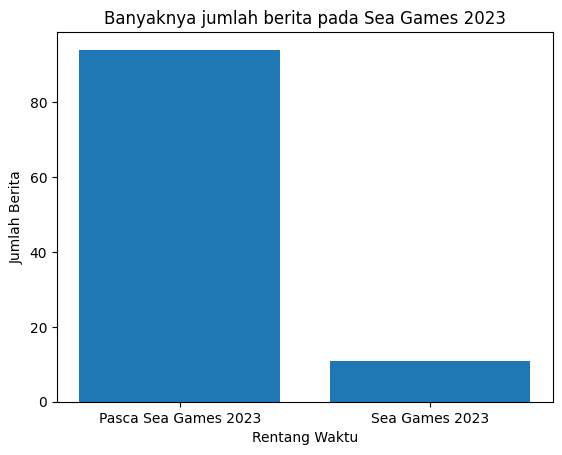

In [ ]:
# Visualisasi dengan bar chart
plt.bar(jumlah_data.index, jumlah_data.values)
plt.xlabel('Rentang Waktu')
plt.ylabel('Jumlah Berita')
plt.title('Banyaknya jumlah berita pada Sea Games 2023')
plt.show()

##Sentimental

In [ ]:
df_s = pd.read_csv('/content/main_s.csv')

# Mengganti bulan "Mei" menjadi "May" dalam kolom "Date"
df_s['Date'] = df_s['Date'].str.replace('Mei', 'May')

# Mengganti format tanggal dalam kolom "Date" menjadi format datetime
df_s['Date'] = pd.to_datetime(df_s['Date'].str.strip(), format='%d %b %Y %H:%M')

#Mengurutkan
df_s = df_s.sort_values('Date')

df_s

,Date,sentimen
32,2023-05-10 11:57:00,-0.8126
48,2023-05-15 18:30:00,0.0000
47,2023-05-16 10:30:00,-0.8834
34,2023-05-16 13:11:00,0.0000
33,2023-05-17 09:02:00,0.0000
...,...,...
3,2023-06-14 12:59:00,0.3612
2,2023-06-15 00:00:00,0.0000
1,2023-06-15 10:30:00,0.0000
0,2023-06-15 20:52:00,0.0772


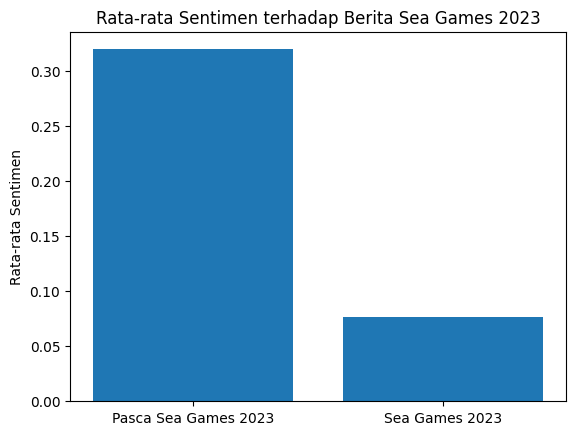

In [ ]:
# Kondisi untuk setiap kelompok
conditions = [
    (df_s['Date'] >= pd.to_datetime('2023-05-05 00:00:00')) & (df_s['Date'] <= pd.to_datetime('2023-05-17 23:59:59')),
    (df_s['Date'] >= pd.to_datetime('2023-05-18 00:00:00')) & (df_s['Date'] <= pd.to_datetime('2023-06-17 23:59:59')),
    (df_s['Date'] >= pd.to_datetime('2023-04-05 00:00:00')) & (df_s['Date'] <= pd.to_datetime('2023-05-04 23:59:59'))]

# Nilai kelompok yang sesuai dengan setiap kondisi
choices = ['Sea Games 2023', 'Pasca Sea Games 2023', 'Pra Sea Games 2023']

# Buat kolom "Kelompok" berdasarkan kondisi
df_s['Kelompok'] = np.select(conditions, choices, default='Pra Sea Games 2023')

# Menghitung rata-rata sentimental dalam setiap kelompok
rata_rata_sentimen = df_s.groupby('Kelompok')['sentimen'].mean()

# Visualisasi dengan bar chart
plt.bar(rata_rata_sentimen.index, rata_rata_sentimen)
plt.xlabel('')
plt.ylabel('Rata-rata Sentimen')
plt.title('Rata-rata Sentimen terhadap Berita Sea Games 2023')
plt.show()

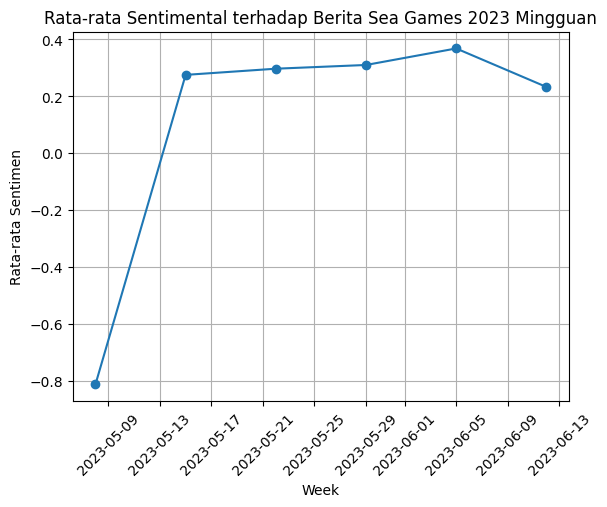

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung rata-rata sentimental per minggu
df_s['Week'] = df_s['Date'].dt.to_period('W').dt.start_time
rata_rata_sentimen = df_s.groupby('Week')['sentimen'].mean()

# Membuat line chart
plt.plot(rata_rata_sentimen.index, rata_rata_sentimen, marker='o')
plt.xlabel('Rentang Minggu')
plt.ylabel('Rata-rata Sentimen')
plt.title('Rata-rata Sentimen terhadap Berita Sea Games 2023 Mingguan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()